## Training & Evaluation

In [ ]:
import sys
sys.path.append('../')

import pandas as pd
from src.training import tune_params
from sklearn.metrics import classification_report

d:\GitHub\Loan-Eligibility-Modelling\.env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Load the data

In [2]:
train_df = pd.read_csv('../data/processed/train.csv')
val_df = pd.read_csv('../data/processed/val.csv')

## Hyperparameters Tuning

**Separate features and target**

In [3]:
X_train = train_df.drop(columns=['Loan_Status'])
y_train = train_df['Loan_Status']

X_val = val_df.drop(columns=['Loan_Status'])
y_val = val_df['Loan_Status']

**Tune the hyperparameters**

In [4]:
best_params = tune_params(X_train, y_train, X_val, y_val)
best_params

d:\GitHub\Loan-Eligibility-Modelling\.env\Lib\site-packages\optuna\samplers\_tpe\sampler.py:295: ExperimentalWarning: ``multivariate`` option is an experimental feature. The interface can change in the future.
  warnings.warn(
[I 2023-11-14 20:19:23,569] A new study created in memory with name: no-name-1c513049-68df-4e73-bbd0-07fce63b61ef
d:\GitHub\Loan-Eligibility-Modelling\notebooks\..\src\training.py:73: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-5, 1e5),
[I 2023-11-14 20:19:23,592] Trial 0 finished with value: 0.8152866242038217 and parameters: {'classifier': 'SVM', 'C': 0.0003630322466779861, 'kernel': 'poly'}. Best is trial 0 with value: 0.8152866242038217.
d:\GitHub\Loan-Eligibility-Modelling\notebooks\..\src\training.py:73: FutureWarning: suggest_loguniform has been deprecated in

{'classifier': 'LogisticRegression', 'C': 710.8199592296867}

**Train the best model**

In [ ]:
best_params

In [ ]:
model = XGBClassifier(**best_params)

## Evaluation

In [5]:
y_pred = model.predict(X_train)
report = classification_report(y_pred, y_train)
print(report)

NameError: name 'model' is not defined

Text(0.5, 1.0, 'ROC Curve')

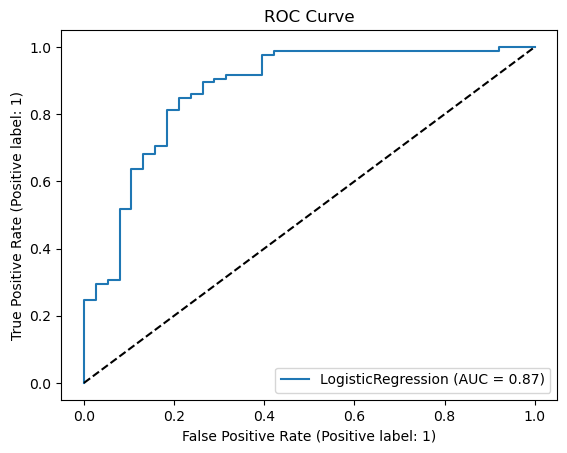

In [ ]:
RocCurveDisplay.from_estimator(classifier, X_test, y_test)
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.title('ROC Curve')

So far, no coefficient seems to be exaggerated.
The credit history has the most important on the model's predictions. Indeed, no credit history means rejection is guaranteed. 

In [ ]:
coef_df = pd.DataFrame(classifier.coef_[0], classifier.feature_names_in_)
coef_df.sort_values(by=0, ascending=False)

,0
Credit_History_1.0,3.081547
Property_Area_Semiurban,0.461820
Married_Yes,0.450716
Dependents_2,0.337570
CoapplicantIncome,0.182194
ApplicantIncome,0.108393
Dependents_3+,0.065514
Dependents_0,-0.021273
Loan_Amount_Term,-0.082197
Self_Employed_Yes,-0.137888
